# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

In [1]:
# Setup

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import math
df = pd.read_csv('D:/progresa_sample.csv/')
df

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77245,98,0.0,1.0,3.148,1.0,4.0,6,137.473203,172.770829,pobre,...,0,0.0,599.0,0.0,67.0,12,348,38623,2,1.0
77246,97,1.0,1.0,3.148,1.0,1.0,6,137.473203,172.770829,pobre,...,0,0.0,599.0,0.0,67.0,7,348,38624,1,1.0
77247,98,1.0,1.0,3.148,1.0,2.0,6,137.473203,172.770829,pobre,...,0,0.0,599.0,0.0,67.0,8,348,38624,1,1.0
77248,97,0.0,1.0,3.148,0.0,2.0,3,137.473203,172.770829,pobre,...,0,375.0,634.0,1.0,38.0,14,348,38625,2,0.0


---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [2]:
# your code here

series1 = pd.Series(df.mean())
series2 = pd.Series(df.std())

df1 = pd.concat([series1,series2], axis = 1)
df1.reset_index(level=0, inplace=True)
df1.columns = ['Variables','Means', 'Standard Deviation']
df1

,Variables,Means,Standard Deviation
0,year,97.500000,0.500003
1,sex,0.512211,0.499854
2,indig,0.298324,0.457525
3,dist_sec,2.418910,2.234109
4,sc,0.819818,0.384342
5,grc,3.963537,2.499063
6,fam_n,7.215715,2.352900
7,min_dist,103.447520,42.089441
8,dist_cap,147.674452,76.063134
9,hohedu,2.768104,2.656106


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [3]:
# your code here

dftreated = df[(df['progresa'] == 'basal') & (df['year'] == 97) & (df['poor'] == 'pobre')].drop(['folnum', 'village', 'year','poor','progresa'], axis = 1)
dfcontrol = df[(df['progresa'] == '0') & (df['year'] == 97) & (df['poor'] == 'pobre')].drop(['folnum', 'village', 'year','poor','progresa'], axis = 1)

s1 = pd.Series(dftreated.mean())
s2 = pd.Series(dfcontrol.mean())
s3 = pd.Series((dftreated.mean()) - (dfcontrol.mean()))
ttest,pval = ttest_ind(dftreated.dropna(), dfcontrol.dropna())
s4 = pd.Series(pval)

df2 = pd.concat([s1,s2,s3,s4], axis = 1)
df2.reset_index(level=0, inplace=True)
df2.columns = ['Variable name','Average value (Treatment villages)', 'Average value (Control villages)','Difference (Treat - Control)','p-value']

df22 = df2[['p-value']].shift(16)
df22 = df22.iloc[16:]
df22.columns = ['p-value '] 
df2 = pd.concat([df2, df22], axis=1).drop(['p-value'], axis=1)
df2 = df2.iloc[16:]
df2.reset_index(level=0, inplace=True)
df2.drop(['index'], axis=1)
df2

,index,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,16,age,10.716991,10.742023,-0.025032,1.956962e-02
1,17,dist_cap,150.829074,153.769730,-2.940656,1.183760e-01
2,18,dist_sec,2.453122,2.507662,-0.054540,9.670949e-01
3,19,fam_n,7.281327,7.302469,-0.021142,9.117959e-02
4,20,grc,3.531599,3.543050,-0.011450,3.947750e-01
5,21,grc97,3.531599,3.543050,-0.011450,4.236088e-01
6,22,hohage,43.648828,44.276918,-0.628090,1.936661e-18
7,23,hohedu,2.663139,2.590348,0.072791,3.414194e-03
8,24,hohsex,0.924656,0.922947,0.001709,2.613239e-02
9,25,hohwag,544.339544,573.163558,-28.824015,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

*Discuss your results here*
- Yes, there are statistically significant differences on many levels. All variables with the p-values less than 0.05 have statistically significant differences between treatment and control villages at baseline.
- The differences at baseline will affect our further evaluation of the impact of Progresa, as we may be unsure if the differences are caused by the program or are they already there at the baseline level.
- We need to try to concel the effect of baseline differences or think of some methods that could bypass it. Also, we may run multiple test to make sure that the Progresa can indeed bring statistically substantial impact on the treatment group.

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

before_avg :  0.8138394110596501 after_avg :  0.8295362042630737
Ttest_indResult(statistic=-2.015713486515638, pvalue=0.04424870036572115)
Reject the null hypothesis.


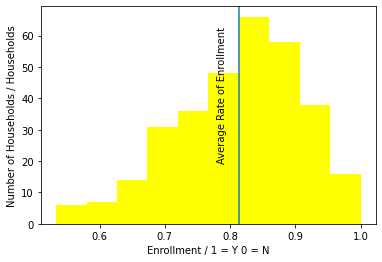

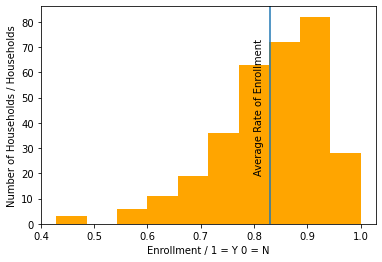

In [4]:
# Your code here

before = df[(df['poor'] == 'pobre') & (df['progresa'] == 'basal') & (df['year'] == 97)].groupby('village').mean()
before_nona = before['sc'].dropna()
before_avg = before_nona.mean()
after = df[(df['poor'] == 'pobre') & (df['progresa'] == 'basal') & (df['year'] == 98)].groupby('village').mean()
after_nona = after['sc'].dropna()
after_avg = after_nona.mean()

fig1 = plt.figure()
plt.xlabel('Enrollment / 1 = Y 0 = N')
plt.ylabel('Number of Households / Households')
plt.hist(before_nona, color = 'yellow', lw = 0)
plt.axvline(x = before_avg)
plt.text(0.78,20,'Average Rate of Enrollment', rotation = 90)

fig2 = plt.figure()
plt.xlabel('Enrollment / 1 = Y 0 = N')
plt.ylabel('Number of Households / Households')
plt.hist(after_nona, color = 'orange', lw = 0)
plt.axvline(x = after_avg)
plt.text(0.8,20,'Average Rate of Enrollment', rotation = 90)

print('before_avg : ', before_avg, 'after_avg : ', after_avg)

t_test = ttest_ind(before_nona, after_nona)
print(t_test)
alpha = 0.05
if (t_test[1] < alpha):
    print('Reject the null hypothesis.')
else:
    print('Not reject the null hypothesis')

*Discuss your results here*
- There does appear to be a difference. The Average Rate of Enrollment before treatment was about 0.8227 and after treatment was about 0.8465.
- Assume the null hypothesis indicates that the difference is not statistically significant, we run the T test and found out the p-value is smaller than 0.05. Therefore we reject the null hypothesis, and the difference IS statistically significant.

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

before_avg :  0.8137762497441701 after_avg :  0.8061845192878945
Ttest_indResult(statistic=0.7816669784862521, pvalue=0.4349129201749543)
Not reject the null hypothesis


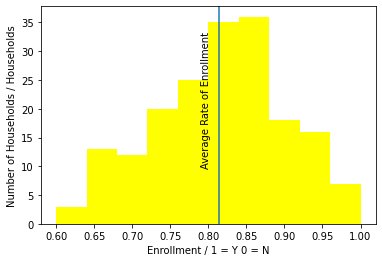

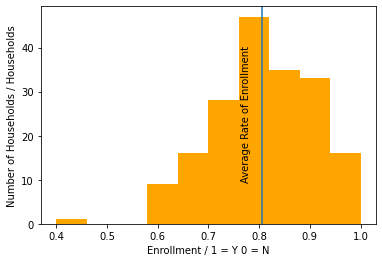

In [5]:
before2 = df[(df['poor'] == 'pobre') & (df['progresa'] == '0') & (df['year'] == 97)].groupby('village').mean()
before2_nona = before2['sc'].dropna()
before2_avg = before2_nona.mean()
after2 = df[(df['poor'] == 'pobre') & (df['progresa'] == '0') & (df['year'] == 98)].groupby('village').mean()
after2_nona = after2['sc'].dropna()
after2_avg = after2_nona.mean()

fig3 = plt.figure()
plt.xlabel('Enrollment / 1 = Y 0 = N')
plt.ylabel('Number of Households / Households')
plt.hist(before2_nona, color = 'yellow', lw = 0)
plt.axvline(x = before2_avg)
plt.text(0.79,10,'Average Rate of Enrollment', rotation = 90)

fig4 = plt.figure()
plt.xlabel('Enrollment / 1 = Y 0 = N')
plt.ylabel('Number of Households / Households')
plt.hist(after2_nona, color = 'orange', lw = 0)
plt.axvline(x = after2_avg)
plt.text(0.765,10,'Average Rate of Enrollment', rotation = 90)

print('before_avg : ', before2_avg, 'after_avg : ', after2_avg)

t_test2 = ttest_ind(before2_nona, after2_nona)
print(t_test2)
alpha = 0.05
if (t_test2[1] < alpha):
    print('Reject the null hypothesis.')
else:
    print('Not reject the null hypothesis')

*Discuss your results here*

- The does exist a difference in enrollment in control villages between 1997 and 1998, the former is around 0.8152 and the latter is around 0.8076, but the difference is NOT statistically significant.
- Since there exist a difference, though not statistically significant, in average rate of enrollment in the control group, I would try to find more factors that could potentially affect the rate and keep them constant while doing the experiment.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [6]:
# Your code here
treat98 = df['sc'][(df['poor'] == 'pobre') & (df['progresa'] == 'basal') & (df['year'] == 98)].dropna()
control98 = df['sc'][(df['poor'] == 'pobre') & (df['progresa'] == '0') & (df['year'] == 98)].dropna()
t_test3 = ttest_ind(treat98.array, control98.array)
print(t_test3)
alpha = 0.05
if (t_test3[1] < alpha):
    print('Reject the null hypothesis.')
else:
    print('Not reject the null hypothesis')

Ttest_indResult(statistic=8.358720567418374, pvalue=6.636344447523235e-17)
Reject the null hypothesis.


*Discuss your results here*
- Assume the null hypothesis indicates that the difference is not statistically significant, we run the T test and found out the p-value is smaller than 0.05. Therefore we reject the null hypothesis, meaning the difference IS statistically significant. I would conclude that there exist a significant effect of the PROGRESA program on the social and economic outcomes of individuals in Mexico.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [7]:
# Your code here
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

df3 = df[df['sc'].notna()]
y = df3['sc'][(df['poor'] == 'pobre') & (df['year'] == 98)].values.reshape(-1,1)
progresa = df3['progresa'][(df['poor'] == 'pobre') & (df['year'] == 98)].values.reshape(-1,1)
progresa = np.where(progresa == 'basal', 1, progresa)
progresa = np.where(progresa == '0', 0, progresa)

y = np.array(y, dtype=float)
progresa = np.array(progresa, dtype=float)


x = sm.add_constant(progresa.ravel())
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           6.64e-17
Time:                        01:41:35   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8076      0.004    220.676      0.000       0.800       0.815
x1             0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Discuss your results here*
- Progresa increases the likelihood of a child enrolling in which if the Progresa program is implemented (treatment assigned), the average rate of school enrollment in the year of survey will increase 0.0388.
- The t-stat and p-value in the summary table are the same as those from part 2.1.
- Since the regression coefficient of treatment assignment is not 0, we reject the null hypothesis that the treatment effects are zero.
- The counterfactual assumption is that the Progresa has no effect on the school enrollment rate.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [8]:
# Your code here

df4 = df3[df3['age'].notna()]
df4 = df4[df4['dist_sec'].notna()]
df4 = df4[df4['hohedu'].notna()]
df4 = df4[(df['poor'] == 'pobre') & (df['year'] == 98)]
df4['progresa'] = df4['progresa'].map({'basal': 1, '0': 0})

multireg = smf.ols(formula='sc ~ progresa + age + dist_sec + hohedu', data=df4).fit()
multireg.summary()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2444.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:41:35   Log-Likelihood:                -7778.5
No. Observations:               27450   AIC:                         1.557e+04
Df Residuals:                   27445   BIC:                         1.561e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5510      0.009    169.427      0.000       1.533       1.569
progresa       0.0357      0.004      8.923      0.000       0.028       0.043
age           -0.0653      0.001    -95.399      0.000      -0.067      -0.064
dist_sec      -0.0113      0.001    -12.961      0.000      -0.013      -0.010
hohedu         0.0087      0.001     11.149      0.000       0.007       0.010
==============================================================================
Omnibus:                     3037.715   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4155.146
Skew:                          -0.945   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Discuss your results here*
- The additional control variables decreased the point estimate of the treatment effect.
- The additional control variables increased the standard error on the treatment effect.
- The Progresa variable has a lower coefficient because the multiple regression is more comprehensive, which could better explain the variance in educational attainment. The control variables may be correlated with the Progresa variable and mistakenly make it seem to have a larger effect in the previous model, so when we add those control variables to the new model, the coefficient of Progresa will decrease.
- The coefficient of dist_sec means that for every 1 unit increase in the nearest distance to a secondary school, there will be a 0.0113 decrease in the average school enrollment rate. We CANNOT say it has a causal impact on educational attainment as the coefficient is fairly small.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [9]:
# Your code here
df97 = df[(df['year'] == 97) & (df['poor'] == 'pobre')]
df98 = df[(df['year'] == 98) & (df['poor'] == 'pobre')]
treated97 = df97['sc'][(df['progresa'] == 'basal')].mean()
treated98 = df98['sc'][(df['progresa'] == 'basal')].mean()
controlled97 = df97['sc'][(df['progresa'] == '0')].mean()
controlled98 = df98['sc'][(df['progresa'] == '0')].mean()

diffindiff = treated98 - treated97 - controlled98 + controlled97
print('diff-in-diff estimate : ',diffindiff)

from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = [" ", "Treated Villages", "Control Villages"]
data = [['Enrollment Rate Before',treated97,controlled97], ['Enrollment Rate After',treated98,controlled98]]
for i in range(len(data)):
     table.append_row(data[i])
print(table)

diff-in-diff estimate :  0.031331280319323085
+------------------------+------------------+------------------+
|                        | Treated Villages | Control Villages |
+------------------------+------------------+------------------+
| Enrollment Rate Before |      0.823       |      0.815       |
+------------------------+------------------+------------------+
| Enrollment Rate After  |      0.846       |      0.808       |
+------------------------+------------------+------------------+


F:\Anaconda\lib\site-packages\beautifultable\utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\beautifultable\utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


*Discuss your results here*
- The difference-in-difference estimate of the impact is around 0.03133. It is lower than the earlier results.
- The counterfactual assumption is that the difference-in-difference estimate would be 0 without Progresa.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [10]:
# Your code here

df5 = df
df5.loc[df5['progresa'] == 'basal', 'progresa'] = 1
df5.loc[df5['progresa'] == '0', 'progresa'] = 0
df5.loc[df5['year'] == 97, 'post'] = 0
df5.loc[df5['year'] == 98, 'post'] = 1
df5 = df5[(df5['poor'] == 'pobre')]

linear = smf.ols(formula='sc ~ post*progresa', data=df5).fit()
print(linear.summary())

multi = smf.ols(formula='sc ~ post*progresa + age + dist_sec + hohedu + post + sex + indig', data=df5).fit()
print(multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           2.76e-18
Time:                        01:41:36   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8152      0

*Discuss your results here*
- The estimate of the impact of Progresa in 1998, i.e. after treatment, is 0.0313 with a standard error of 0.006, while the estimate coefficient for all households in 1998 is -0.0075 with a standard error of 0.005. We can see that Progresa has a positive effect on average school enrollent rates.
- It only slightly changed as more control variables were added. The post:progresa variable becomes slightly larger (0.0313 to 0.0314). This might be because our original coefficient in (i) is already accurate enough, and other control variables have little hidden correlation with the post:progresa variable here.
- The estimates from (i) and (ii) are almost the same compare to the difference-in-difference estimates from 2.4 above, only very slightly more in (ii).
- The counterfactual assumption is that the pre-and-post differences in the treated group and control group would be the same without Progresa.

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [12]:
# Your code here

df6 = df3
df6.loc[df6['progresa'] == 'basal', 'progresa'] = 1
df6.loc[df6['progresa'] == '0', 'progresa'] = 0
df6.loc[df6['year'] == 97, 'post'] = 0
df6.loc[df6['year'] == 98, 'post'] = 1
df6 = df6[(df6['poor'] == 'no pobre')]

linear = smf.ols(formula='sc ~ post*progresa', data=df6).fit()
print(linear.summary())

multi = smf.ols(formula='sc ~ post*progresa + age + dist_sec + hohedu + post + sex + indig', data=df6).fit()
print(multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           0.000276
Time:                        01:42:04   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7626      0

*Discuss your results here*
- The impact of progresa over time on non-poor enrollment is only subtle because the estimate coefficients, i.e. 3.428e-05 and -0.0017, of the interaction term in these 2 models are very close to 0, and their p-value are way larger than 0.05, the statistical significance dividing line.
- Progresa is a social assistance program where the government provides money as supports for good deeds like school attendance of poor households. Non-poor households may also raise their awareness on school enrollment as the campaign goes on. Besides, Progresa could improve the society systematically and result in non-poor households being impacted as well. For instance, poor household may pay their subsidy money to non-poor's businesses, making non-poors have more money to spend on education.

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

*Discuss your results here*
- I believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico since the change before and after the program is statistically significant in many cases from above analyses.
- We can also build an interaction term on age and progresa and perform a DID regression to see if the program could have a greater impact on elder or younger students. The counterfactual assumption would be that the pre-and-post difeerence in average school enrollment rate at every age level would be 0 without the Progresa program.